# Chapter 7: Parametric Methods: Linear and Genralized Linear Models

* remember the regression function?

* we estimate using the average of the Y values near the one we want to predict for kNN or for DT we follow along the tree and average those in the terminal node

## 7.1. Motivating Example: The Baseball Player Data

In [0]:
import pandas as pd
import numpy as np
### INSERT YOUR PATH to data HERE: ###
my_path = '/content/drive/My Drive/ecs171_yancey/Lecture_Notes/Chapter_7/mlb.txt'

mlb = pd.read_csv(my_path, sep=' ')

mlb.head()

,Name,Team,Position,Height,Weight,Age,PosCategory
1,Adam_Donachie,BAL,Catcher,74,180,22.99,Catcher
2,Paul_Bako,BAL,Catcher,74,215,34.69,Catcher
3,Ramon_Hernandez,BAL,Catcher,72,210,30.78,Catcher
4,Kevin_Millar,BAL,First_Baseman,72,210,35.43,Infielder
5,Chris_Gomez,BAL,First_Baseman,73,188,35.71,Infielder


* to estimate r() we take the mean of players with height 71

In [0]:
mlb.loc[mlb.loc[:,'Height'] == 71,'Weight'].mean()

190.35955056179776

* pandas groupby says group weight values by height and take the mean of each group

In [0]:
grouped = mlb.groupby('Height')
means = grouped.mean()
print(means)

            Weight        Age
Height                       
67      172.500000  31.160000
68      173.857143  27.805714
69      179.947368  29.643158
70      183.098039  29.697059
71      190.359551  29.079551
72      192.560000  28.767467
73      196.771605  29.159074
74      202.456647  28.762197
75      208.716129  28.107032
76      214.138614  28.094950
77      216.727273  29.114545
78      220.444444  27.153704
79      218.071429  26.537857
80      237.400000  28.956000
81      245.000000  28.410000
82      240.500000  35.620000
83      260.000000  28.420000


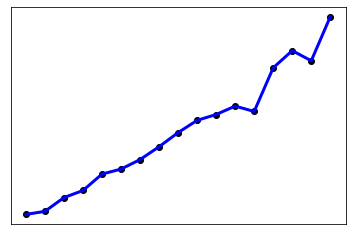

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

heights=pd.DataFrame(list(means.index))

plt.scatter(heights, means.iloc[:,0],  color='black')
plt.plot(heights, means.iloc[:,0], color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

* clearly this is a linear model 

* r(t) = b + mt

### 7.1.2. View as Dimension Reduction

* since we can predict with only one column, this is a form of dimension reduction

## 7.2. The LinearRegression() Model

In [0]:
X = mlb.iloc[:,list(range(1,3)) + list(range(4,7))]
X

,Team,Position,Weight,Age,PosCategory
1,BAL,Catcher,180,22.99,Catcher
2,BAL,Catcher,215,34.69,Catcher
3,BAL,Catcher,210,30.78,Catcher
4,BAL,First_Baseman,210,35.43,Infielder
5,BAL,First_Baseman,188,35.71,Infielder
...,...,...,...,...,...
1030,STL,Relief_Pitcher,190,25.08,Pitcher
1031,STL,Relief_Pitcher,180,25.73,Pitcher
1032,STL,Relief_Pitcher,205,25.19,Pitcher
1033,STL,Relief_Pitcher,190,31.01,Pitcher


In [0]:
from sklearn import linear_model

regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(pd.DataFrame(mlb.loc[:,'Height']) , pd.DataFrame(mlb.loc[:,'Weight']) )

# The coefficients
print('Coefficients: \n', regr.intercept_, regr.coef_)
print('So, for someone with height 71 we would compute: \n', regr.intercept_, '+ 71 x', regr.coef_)
print('or: \n', regr.intercept_[0] + 71 * regr.coef_[0])
regr.predict([[71]])


Coefficients: 
 [-151.13329063] [[4.78333164]]
So, for someone with height 71 we would compute: 
 [-151.13329063] + 71 x [[4.78333164]]
or: 
 [188.48325579]


array([[188.48325579]])

## 7.4. Multiple Features

### 7.4.1. MLB contd.

* Usually we fit our data to multiple features

* eg. say the player is age 28

In [0]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(pd.DataFrame(mlb.loc[:,['Height', 'Age']]) , pd.DataFrame(mlb.loc[:,'Weight']) )

# The coefficients
print('Coefficients: \n', regr.intercept_, regr.coef_)

regr.predict([[71, 28]])

Coefficients: 
 [-187.63817542] [[4.92359939 0.91153264]]


array([[187.46029549]])

### 7.4.2. Impact of Adding more Features

* what if the age was slightly higher?

In [0]:
regr.predict([[71, 31]])

array([[190.19489341]])

* indicates players do gain weight as they age (in spite of needing to stay fit)

  * ~0.9 lb/yr

* remember that this is a sample so it is an estimate of the effect; we dont know that this is exact

* we only have 2 features here and n=1023 data points so we dont need to worry as much about overfitting

## 7.5. How it Works

* **OLS** (ordinary least squares regression) is used to create the **m** and **b**

* eg. our error is the actual value minus the b + (m * height) squared in our previous example

  * so say we had other heights such as 74, and 73 in our data, then our OLS is:
  
  (180 - (b + 71 * m))^2 + (180 - (b + 74 * m))^2  +(180 - (b + 73 * m))^2 

* we choose m and b to minimize the above loss equation

* each Y - predicted Y is called a ***residual***



## 7.6. Diagnostics: Is the Linear Model Valid?

### 7.6.1. Exactness?


* no model is ***exact***

* if it were to predict exact it wouldnt be in a straight line

7.6.2. Diagnostics Models

* some models have been developed to check the validity of linear models

  * one involves kNN

* linear models make assumption that data is linear (while knn does not)

* basically we just compare the predicted values to kNN 

7.6.3. Example: Million Song Data

In [0]:
import pandas as pd
import numpy as np

my_path = '/content/drive/My Drive/ecs171_yancey/Lecture_Notes/Chapter_3/YearPredictionMSD.txt'
ms = pd.read_csv(my_path, header=None)


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(ms.iloc[:,1:],ms.iloc[:,0], test_size=1000)

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train )
linpreds = regr.predict(X_test)

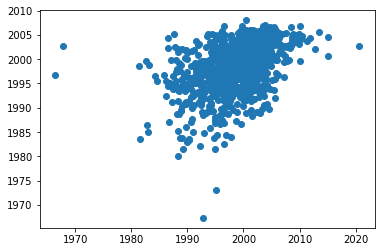

In [0]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train )

knnpreds = knn.predict(X_test)

import matplotlib.pyplot as plt

plt.plot(linpreds, knnpreds, 'o')

* since there is some correlation, the model is useable

#### 7.7.1.4. More on lm

* `score` will return the **R^2** coefficient of determination of the prediction

* defined as **(1 - u/v)** : correlation between actual and predicted Y (proportion of variation due to X)

  *  **u** is the residual sum of squares ((y_true - y_pred) ** 2).sum() **bold text**
  
  * **v** is the total sum of squares ((y_true - y_true.mean()) ** 2).sum() **bold text**
  
  * best possible score is **1.0** 
  
    * negative if model is arbitrarily worse
  
  * eg. constant model that always predicts the mean value of y (disregarding the input features) would have a R^2 score of 0.0

* but be careful not to rely to much on this (cross validation is still best to choose features of importance) becuase we are predicting the same data so overfitting is a possiblility

In [0]:
regr.score(X_train, y_train)

0.23699080642238834

* also the adjusted R^2 is supposed to be less suseptible to overfitting

In [0]:
import statsmodels.api as sm
X1 = sm.add_constant(X_train)
result = sm.OLS(y_train, X1).fit()

print(result.rsquared, result.rsquared_adj)

0.23699080642238768 0.23685727157886294


## 7.8. Polynomial Models



* can be used to model non-linear effects

* connections to NN and SVM!

### 7.8.1. Motivation


* lets look at the programmer and engineer data

* there seems to be a steep rising between 20 and 30 and then a long leveling off and decline after around 55

* this is not linear!

![alt text](https://lh3.googleusercontent.com/F_QuXp08VhnkrMrPTdlhQsaEy5RXN6MapKxzzlaTCHuw8onKKT0UM9HQf_4y63TFEuaH7ouQ0fCoxlruLgtuLBYrWekDDaVB1DS7J8WvPLoyfe5j524CKvrqFmDO_OEBEKPmjCDjschIYqZpe12CDdZrDxDXfTJv6hSW1dTuU7h2_7bRmbrPYe6ZktcV9DYZp_AGZAqmDvWaLVBv1MfYuEdtpyFNHofFFWE4svVRtQIHtxVtXv9TvcgzS5JBDgjLebTWLDiL7MDuqrk-Mp_EGKxvuWpkkrk7df0s5lJSJ_6J4kCvK3-gk5PpccPCV8R3_mFKwHdHE0Y6Uvc8p5n6sWvsh7lNw3jwwoF0n4Krz8Nk_AaXmngFFzNtXHkTzT3KqW1JWpkna5hmqAmcjObQTPP4RxwebiKX3Re1ZRDZk1E7Hn1Jsqy6bRpH9Oxd7bFzZtZVld2v8A1m3fLJRwRgVyz5QhtdkjMW68AGZM0CMtBb5gEBubmivG7o_CgPDPuL2gKZlLPHxfa9WExaR6pXrK1-N0d3RL6Y6gXzx-ACv4JDiiNuu1KXNXksrqP5GhtLIUSdxDRkjBkgr2B0fxdibiv_sgNgKpmGzYgQ237Ks8rY2wGpdfwEZXah4ZkOYNwDRz7bmT4aaSuPNpNHNA8izO-Hu5p8K1jL_znJXWNs4EO_boAIUAhyOQ=w764-h672-no?authuser=0)


* Or look at the bike sharing data 

* clearly too cold or too hot is not when people want to ride; but its definitley not linear


![alt text](https://lh3.googleusercontent.com/CPudDRw6KpgqaRnZN-QkyzAnk6SSWxWRCgG-gpFK4NXQzFP4Z8TP3X_5PjOt16NNlBi_h68GZ5EocHlH18r7M81nmJUbb2CyRG0WuV7t2iq0L9v1TkaklpNGor6Bt54U09SSycX-g1jm97RyR7FaetMbGB-J2zROXrDzoyM7l1asml6UmaZcqa0baam-Z7NmCVLombQdk61H6Uye0Ga08SbcWyNnz0_XURrEgrhWndqHSv_bCPQHwKMykWPK48CzJK52Jr_S7nA6iLnVyKG45jyb90IJaa6AuolLFBlT3FSCIkfrP-Jh2J_lycZIrnlhkGeuw0tT7Wv8Ht2c1pRuKfFeJzVH76KrfvZKq5YebznK0OKGQcLwrAFPqNNEDUbqcMhyi-4F70jL0pE4AhNUwQl5SCZNbGHcDP6bhMIbr6p_3hPeXT07vlXezkxQ72tWqf4wLqdCMwEa1m_Pv0iblzwqbIiTF-ArkI7GiK79clO_w7JzDMrnXNbTN0uIt9zkPrJMeIpqPYv-IhSxj2JuYCqbQgZPGmeI0FWqV0NGQY81V-rNICSlQJI1CnSkES16t8dV-0LHh9fArDRyQYeFikINwoKK11F8mmzcbDOQf2i98tLNHxqDXqi5Ln_vi1qT6PMyY7HQVV3ysBreDycp_UL6_xTOpACk0tYwQLUBHZ0dWZIl0hJeBg=w806-h724-no?authuser=0)



### 7.8.2. Modeling Nonlinearity with a Linear Model

In [0]:
import pandas as pd
my_path = '/content/drive/My Drive/ecs171_yancey/Lecture_Notes/Chapter_1/day1.csv'

# load .csv using Pandas library
day1 = pd.read_csv(my_path)

# look at the first few rows and show features 
day1.head(3)

,Unnamed: 0,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,tot
0,1,1,2011-01-01,1,0,1,0,6,0,2,8.175849,7.999250,0.805833,10.749882,331,654,985
1,2,2,2011-01-02,1,0,1,0,0,0,2,9.083466,7.346774,0.696087,16.652113,131,670,801
2,3,3,2011-01-03,1,0,1,0,1,1,1,1.229108,-3.499270,0.437273,16.636703,120,1229,1349


* choosing a few interesting features for the demo

In [0]:
d1 = day1.iloc[:,list(range(4,9))+ [10] + [12] + [13] + [16] ]
d1.head()

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,tot
0,0,1,0,6,0,8.175849,0.805833,10.749882,985
1,0,1,0,0,0,9.083466,0.696087,16.652113,801
2,0,1,0,1,1,1.229108,0.437273,16.636703,1349
3,0,1,0,2,1,1.400000,0.590435,10.739832,1562
4,0,1,0,3,1,2.666979,0.436957,12.522300,1600


* first lets fit a purely linear model

In [0]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

regr.fit(d1.iloc[:,0:7] , pd.DataFrame(d1.iloc[:,8]) )

print('coefs',regr.coef_ )
print( 'score (R)',regr.score(d1.iloc[:,0:7], pd.DataFrame(d1.iloc[:,8])))

import statsmodels.api as sm
X1 = sm.add_constant(pd.DataFrame(d1.iloc[:,0:7]))
result = sm.OLS(pd.DataFrame(d1.iloc[:,8]), X1).fit()

print('R',result.rsquared, 'R^2', result.rsquared_adj)

coefs [[ 2024.65574877   106.05876644  -591.61235056    52.59435717
     90.8550353    130.21122387 -2131.47130861]]
score (R) 0.736398032773838


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


R 0.736398032773838 R^2 0.7338458698822984


* now lets try adding a temperature squared term

In [0]:
d1.loc[:,'temp^2'] = d1.loc[:,'temp'].values ** 2
d1.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,tot,temp^2
0,0,1,0,6,0,8.175849,0.805833,10.749882,985,66.844507
1,0,1,0,0,0,9.083466,0.696087,16.652113,801,82.509355
2,0,1,0,1,1,1.229108,0.437273,16.636703,1349,1.510706
3,0,1,0,2,1,1.400000,0.590435,10.739832,1562,1.960000
4,0,1,0,3,1,2.666979,0.436957,12.522300,1600,7.112777


In [0]:
from sklearn import linear_model
import statsmodels.formula.api as sm

regr = linear_model.LinearRegression()
regr.fit(d1.iloc[:,list(range(0,8)) + [9]], pd.DataFrame(d1.iloc[:,8]))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
print(regr.coef_)

X1 = sm.add_constant(d1.iloc[:,list(range(0,8)) + [9]])
result = sm.OLS(pd.DataFrame(d1.iloc[:,8]), X1).fit()

print('R',result.rsquared, 'R^2', result.rsquared_adj)

[[ 1904.30638895    65.49186901  -501.26016906    54.22613621
     57.40859172   337.69180081 -3362.23530988   -69.94496992
     -6.89399874]]
R 0.8107810293325292 R^2 0.8084190726945164


In [0]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tot   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     343.3
Date:                Thu, 14 May 2020   Prob (F-statistic):          8.33e-254
Time:                        19:49:44   Log-Likelihood:                -5961.2
No. Observations:                 731   AIC:                         1.194e+04
Df Residuals:                     721   BIC:                         1.199e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2899.1676    213.149     13.602      0.000    2480.700    3317.635
yr          1904.3064     63.681     29.904      0.000    1779.284    2029.328
mnth          65.4919      9.823      6.667      0.000      46.207      84.777
holiday     -501.2602    195.177     -2.568      0.010    -884.444    -118.076
weekday       54.2261     15.766      3.439      0.001      23.273      85.179
workingday    57.4086     69.853      0.822      0.411     -79.730     194.547
temp         337.6918     15.223     22.183      0.000     307.805     367.579
hum        -3362.2353    240.468    -13.982      0.000   -3834.336   -2890.135
windspeed    -69.9450      6.429    -10.880      0.000     -82.566     -57.323
temp^2        -6.8940      0.482    -14.299      0.000      -7.841      -5.947
==============================================================================
Omnibus:                      105.119   Durbin-Watson:                   1.100
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              201.982
Skew:                          -0.851   Prob(JB):                     1.38e-44
Kurtosis:                       4.932   Cond. No.                     3.87e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* as shown above multicollinearity is likely present

* a major issue with multi-dimensional Polynomial Regression is multicollinearity
 
* this is the interdependence between the predictors

  * restricts the model from fitting properly on the dataset

* note that the other coefficients have changed

* also note that the coefficient for temp^2 is negative (reflecting the concave down)

* and note that the R^2 term is much higher ( a substantial increas)

### 7.8.3. Is it Really Linear?

* yes, eg. what if we multiplied each term by a constant? then the whole model would go up by exactly that much at each point - meaning it is linear


### 7.8.4. Polynomial Models

* what if we included a square or even a cube for all the other terms?

  * this has been shown to reduce bias but increase variance, so we need to be aware of possibel overfitting

* say we try all the possible models and use cross validation to see which is best

* one thing we must be careful of is to make sure dummy variables are not multiplied by eachother for one of our features (because they would all be 0)

In [0]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np

X = d1.iloc[:,list(range(0,8))].values
y = pd.DataFrame(d1.iloc[:,8]).values


poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

# Predicting a new result with Polymonial Regression
pol_reg.predict(poly_reg.fit_transform(pd.DataFrame(d1.iloc[7,list(range(0,8))]).T))

array([[433.75]])

In [0]:
t=pd.DataFrame(d1.iloc[7,list(range(0,8))]).T
t.loc[:,'mnth'] = 4
t.loc[:,'temp'] = 10
pol_reg.predict(poly_reg.fit_transform(t))

array([[3596.0625]])

In [0]:
X1 = sm.add_constant(X_poly)
result = sm.OLS(y, X1).fit()

print('R',result.rsquared, 'R^2', result.rsquared_adj)
result.summary()

###  7.8.5. Polynomials & Overfitting

* lets illustrate this on a dataset

In [0]:
import pandas as pd

### INSERT YOUR PATH to data HERE: ###
my_path = '/content/drive/My Drive/ecs171_yancey/Lecture_Notes/Chapter_7/prgeng.csv'

# load CSV using pandas library
pe = pd.read_csv(my_path)
pe = pe.iloc[:,list(range(1,5))+[6]+[5]]

peDumms=pd.get_dummies(pe.iloc[:,list(range(2,4))].astype(str),drop_first=True)

pe = pe.loc[:,['age', 'educ','wkswrkd','wageinc']]
pe=  pd.concat([peDumms,pe],axis=1)
pe.head()

,occ_101,occ_102,occ_106,occ_140,occ_141,sex_2,age,educ,wkswrkd,wageinc
0,0,1,0,0,0,1,50.300816,13,52,75000
1,1,0,0,0,0,0,41.101390,9,20,12300
2,0,1,0,0,0,1,24.673740,9,52,15400
3,0,0,0,0,0,0,50.199512,11,52,0
4,0,0,0,0,0,1,51.181124,11,1,160


In [0]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(pe.iloc[:,list(range(0,9))], pd.DataFrame(pe.iloc[:,9]), test_size=1000)

In [0]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import numpy as np

for i in range(1,6):

  poly_reg = PolynomialFeatures(degree=i)
  X_poly = poly_reg.fit_transform(X_train.values)
  pol_reg = LinearRegression()
  pol_reg.fit(X_poly, y_train.values)

  preds = pol_reg.predict(poly_reg.fit_transform(pd.DataFrame(X_test.values)))
  print(mean_absolute_error(y_test.values,preds))
  print('number of predictors', pol_reg.coef_.shape[1])

25934.346387822272
number of predictors 10
24857.46082233856
number of predictors 55
24567.895331082695
number of predictors 220
24548.99284991046
number of predictors 715
24825.509559945287
number of predictors 2002


* note years of education is converted to dummies in textbook so there is more


* p includes the interaction features (x1*x2) as well as squared terms 

* performance goes down after degree 3 (or 2 or 4 in some cases

## 7.9. What about standard error?

* independent variables are the coefficients (also represented as betas) and the constant (alpha)

* but we need some measure to tell you how strongly each is is associated with your dependent variable Y

  * **std error** is an estimate of the standard deviation of the coefficient across all samples

  * can be thought of as a measure of the precision (or accuracy) with which the regression coefficient is measured

    * the smaller, the more precise the estimate
  
  * it is helpful to discover **whether the coefficients on your independent variables are really different from 0** (having some effect on your dependent variable (not just due to random chance)

    * eg. if a coefficient is large compared to its standard error, then this coeff. is probably different from 0


---


* The t statistic is the coefficient divided by its standard error
  


In [0]:
import statsmodels.api as sm
X1 = sm.add_constant(pe.iloc[:,list(range(0,9))])
result = sm.OLS(pd.DataFrame(pe.iloc[:,9]), X1).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                wageinc   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     702.8
Date:                Fri, 15 May 2020   Prob (F-statistic):               0.00
Time:                        21:09:57   Log-Likelihood:            -2.4263e+05
No. Observations:               20090   AIC:                         4.853e+05
Df Residuals:                   20080   BIC:                         4.854e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.101e+04   2671.255    -30.328      0.000   -8.62e+04   -7.58e+04
occ_101     1505.5442    895.020      1.682      0.093    -248.769    3259.857
occ_102      1.24e+04    829.636     14.945      0.000    1.08e+04     1.4e+04
occ_106      610.6066   2003.921      0.305      0.761   -3317.243    4538.456
occ_140     1.131e+04   1636.415      6.913      0.000    8105.511    1.45e+04
occ_141     9355.1946   1039.495      9.000      0.000    7317.699    1.14e+04
sex_2      -8545.1380    711.038    -12.018      0.000   -9938.831   -7151.445
age          464.7875     27.127     17.134      0.000     411.617     517.958
educ        4787.6644    189.153     25.311      0.000    4416.908    5158.421
wkswrkd     1288.6680     20.748     62.110      0.000    1248.000    1329.336
==============================================================================
Omnibus:                    14248.181   Durbin-Watson:                   1.902
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           278964.934
Skew:                           3.219   Prob(JB):                         0.00
Kurtosis:                      20.083   Cond. No.                         563.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 7.10. Classification: Logistic Model

![alt text](https://lh3.googleusercontent.com/31hix3IM8T8t0Bkf_QvWrXL0-06sWZ-L_tgvuhqfpU574W9rFBdp30zl6IhUtHU5zJzHCDxIa15BhWWyxJ-uFEMZU1l2oLqF2ohR3Q5kgL3dnfitotQTp_CqjtI2I5BG3T93Wgvx3giQ7SorfZl_P1IzA6Ae3Jqhd4lp4F9Y0EWoAU3fKSJFW09UpHVyaPt3fvlYDKnh4PZVXErrHjobhFAXatjCkHRCiQA0hyQyblG9tnJReWL1KiksTV09h-mdS4dW6djs-yJJd-JYP_SX7b2RZkZ7vkEqb8jNbzWnrAXOykM7xW_W1IRWgBap4Q3gbGwgpk9p6OFasxLsJcIsRkUQ5kO6zqWPUYNKH0dd6lOHPASGxpnIejsAHCwRXcZ-B40a0_raw8baLC76uDW2T-irJEa7tFdhl-kfBeOCCgVE4VJNcqOzradMpd_4X-5QxTYREyQd48e7NlR1JslQ-EAyJa9hja7K1sZGmJe16CPDhqGnvJwsKZJvS7CsSACSgOMIcD0PvOuUOmPwUIY5xpYjbTeoisV1D1H3g7iBGzemZjuF9zY-stMN5y1_dizrOD3Tj8FWrNmN6qiU-Q29egqALUCEB7JtaUeBfTD_kI30i6XHBYLcT9GpCM2exFNaIbFRH83ZC-N8aNMzUpdbi5URNGx6i7HvQmHOsliQUJNPWVgdpMO0mg=w1934-h976-no?authuser=0)

![alt text](https://lh3.googleusercontent.com/RC8qeN-s2ZiC-Q3Z6xvrX1MRo6HszrXyoiQadgvn1ZlQDPF4CCseDWE9mDyVhU3hE05m8DpMx2Au3RwgRwRbOpsdUhurJ6NC8TmyYhU1hIe0U4RWeRyU-vw_BR8LsRMuzx7c1ROAU-fvRrDcBL0THel9QpCX7cJsFi-DZRaGD3HxXUxCHitZ2j0DZq71LY30e7WddSKbzvxW6kLbHkF7PfMAAYn-LebqcP2jq-VIpaeOtEPIRhEV7aKvLf7RGV8XwfnbzjGErjLRXQMq3YwgKcsTjlXdqCFidu_-VmH8xonQn5ERw0ZCDmQRdtdR28w4-CyGbfowTK5snkU2xGRosy-wt93l7mScdbu34gCX40dCtp-tDfWzeeSTMQhMB63xWyr4sDywqyPrv4ZAVmvWBEebPk5j9hBhnAOc-HPADgvdjncyKbtXx5OUAJiUFvsHfDeiqVTV6lNDYlP-820JehNgENIziOsCFX-6IlX2qy6fU0FKEZxYe_qvGGru-70a91cGMqd5bmnky_WhXQG4it_vOeIDWst_F3VtlDKCmAMJj57d3zfZ7GCmdZXJAylPtciTe7ZYzvIbxIqMAIXwIPCM1x-PMD_3Fh5Y3UzUJ9OV7ZOfdmF33l7xhVDRv9BhQUM_r3PyTVAUzcxj1OLU9dq88nGUu2cTpC7-I_ta_pYkqvWaO5cn-w=w1550-h938-no?authuser=0)

image source: https://www.bioconductor.org/help/course-materials/2003/Milan/Lectures/anestisMilan3.pdf

* for classification we use a "generalized linear model" 

* remember we est. the prob of a 1 for Y

* so we run the regression estimates through the logitic function 1/(1 + e^-t) so that they are in the interval [0 1]

* so we are still minimizing squared error loss but there are weights in front of each squared term



---



* weights are applied via **IRLS: iteratively reweighted least squares**:  

  * classic LINEAR regression model assumes that the variance is a
constant; which leads to the ordinary (i.e. unweighted) least
squares estimate, minimizing

\sum_{i=1}^n (Y_i - b'X_i)^2

  * if the variances are not constant, but are known quantities, we minimize the **weighted** sum of squares:

\sum_{i=1}^n **1/\sigma_i^2** (Y_i - b'X_i)^2

  * at any iteration we have a guess for variance (eg. sigma_i^2 = p(1-p) = (b'X_i) (1 - b'X_i), since Y is Bernoulli), so we plug this in and repeat until estimates stop changing

   * usually requires no learning rate

### 7.10.1. Ex.: Telco Churn Data

* revisiting with GLM

* there are a number of different glm models we could us ein Python. This blog shows a helpful comparsion of the the OLS and sklearn methods and there different implementations: http://www.kellieottoboni.com/posts/2017/07/logistic-regression-python/

* we will use the statsmodels implementation here (which uses IRLS)



In [2]:
import pandas as pd

my_path = '/content/drive/My Drive/ecs171_yancey/Lecture_Notes/Chapter_2/WA_Fn-UseC_-Telco-Customer-Churn.csv'

telco = pd.read_csv(my_path)
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
telco['TotalCharges'] = telco['TotalCharges'].apply(lambda x: pd.to_numeric(x, errors ='coerce'))
telco = telco.drop(['customerID'],axis=1)

tc = pd.get_dummies(telco, columns=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'], drop_first=True)

tc1 = tc.dropna()
tc1.head()
tc1.shape

(7032, 31)

In [4]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(tc1.iloc[:,0:15], pd.DataFrame(tc1.loc[:,'Churn_Yes']), test_size=1000)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
import statsmodels.api as sm
model = sm.GLM(y_train, X_train,family=sm.families.Binomial()).fit()
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Churn_Yes   No. Observations:                 6032
Model:                            GLM   Df Residuals:                     6019
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2585.7
Date:                Tue, 19 May 2020   Deviance:                       5171.4
Time:                        20:25:25   Pearson chi2:                 6.27e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
tenu

In [0]:
predictions_nominal = [ 0 if x < 0.5 else 1 for x in ypred]

In [0]:
predictions_nominal 

In [14]:
from sklearn.metrics import accuracy_score
ypred = model.predict(X_test)
accuracy_score(y_test,predictions_nominal )

0.8

* This is slightly higher than KNN and the prediction in the textbook which uses all of the features (here we only used half.)

7.10.2. Multiclass Case

* if more than 2 classes, we use either OVA or AVA

* lets use the vert data as an example


* **OVA**: we predict using glm on each of the 3 classes, with Y being either only DH, only NO or only SL and then take the class with the highest probability

* **AVA**: we predict using glm for each pair of classes eg. DH vs NO, DH vs SL, and NO vs SL (call glm 3 times again). we choose the class that wins most often; ties resolved somehow.



#### 7.10.2.1. Ex. Fall Detection Data

* 6 classes: standing to walking... to running

In [25]:
import pandas as pd

my_path = '/content/drive/My Drive/ecs171_yancey/Lecture_Notes/Chapter_7/falldetection.csv'

fd = pd.read_csv(my_path)
fd.head()

,ACTIVITY,TIME,SL,EEG,BP,HR,CIRCLUATION
0,3,4722.92,4019.64,-1600.00,13,79,317
1,2,4059.12,2191.03,-1146.08,20,54,165
2,2,4773.56,2787.99,-1263.38,46,67,224
3,4,8271.27,9545.98,-2848.93,26,138,554
4,4,7102.16,14148.80,-2381.15,85,120,809


In [16]:
fd.dtypes

ACTIVITY         int64
TIME           float64
SL             float64
EEG            float64
BP               int64
HR               int64
CIRCLUATION      int64
dtype: object

In [0]:
fd["ACTIVITY"] = fd["ACTIVITY"].astype('category')

* sklearn logistic regression, multiclass case uses the one-vs-rest (OvR) scheme if `multi_class= 'ovr'`

In [34]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression


X_train, X_test, y_train, y_test = train_test_split(fd.iloc[:,1:], pd.DataFrame(fd.loc[:,'ACTIVITY']), test_size=1000)

model = LogisticRegression(multi_class= 'ovr')
 
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
from sklearn.metrics import accuracy_score

accuracy_score(y_pred, y_test)

In [37]:
my_tab = pd.crosstab(index=fd["ACTIVITY"],columns="count") 
print(my_tab)
x=my_tab.values.tolist()/sum(my_tab.values)
print('Percentage of Yes and No:')
x.tolist()

col_0     count
ACTIVITY       
0          4608
1           502
2          2502
3          3588
4          3494
5          1688
Percentage of Yes and No:


[[0.28128433646685386],
 [0.030643389085581736],
 [0.15272860456598705],
 [0.21902087657184716],
 [0.2132828714442681],
 [0.1030399218654621]]

* so if we guessed activity 0 we would get 28%, so we did better



## 7.11. Bias vs. Variance in LM and GLM 

* the more features the larger the variance, smaller the bias (again)

* but comes in the form of less stable estimates of the coefficients.